In [ ]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_2v.csv to train_2v.csv


In [ ]:
data = pd.read_csv("train_2v.csv")

data.head()

data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


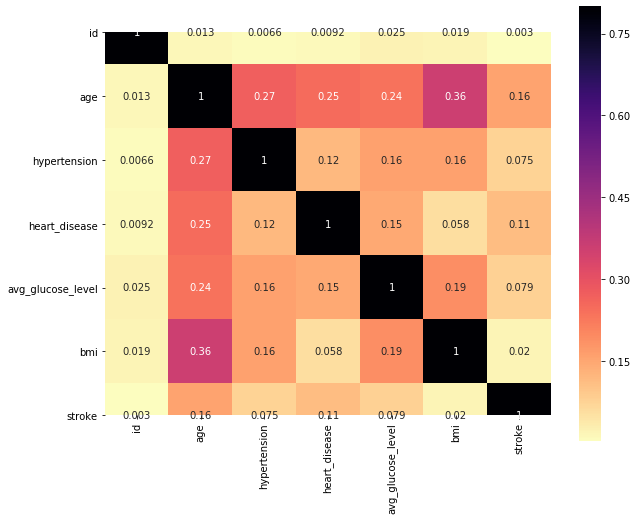

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.cubehelix_r
corrmatrix = data.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, vmax=0.8, square=True, cmap = 'magma_r',annot=True)
#corrmatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



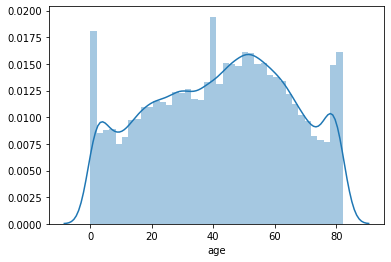

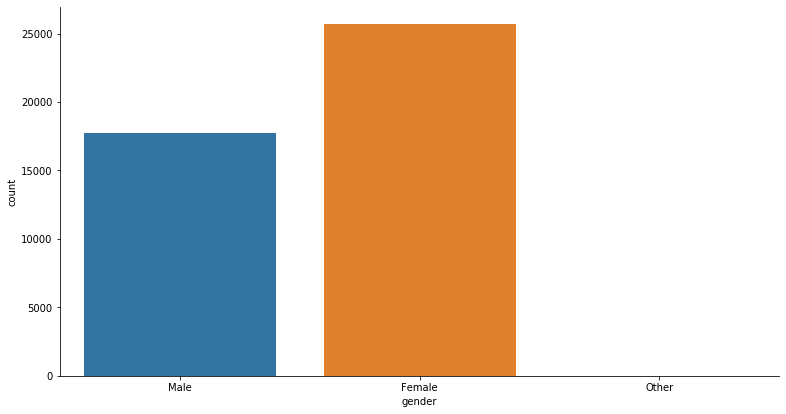

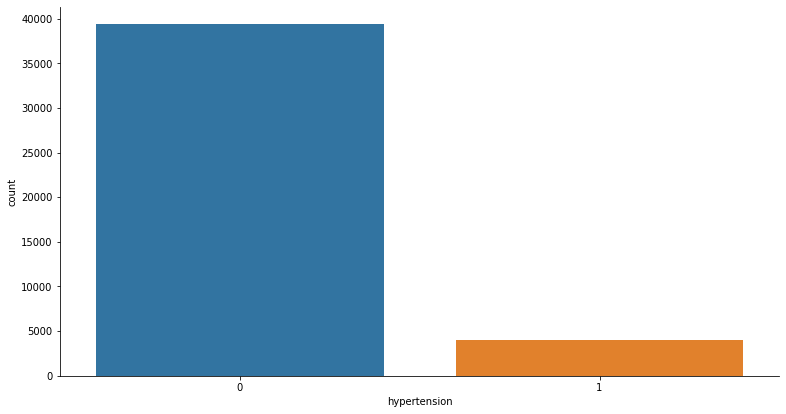

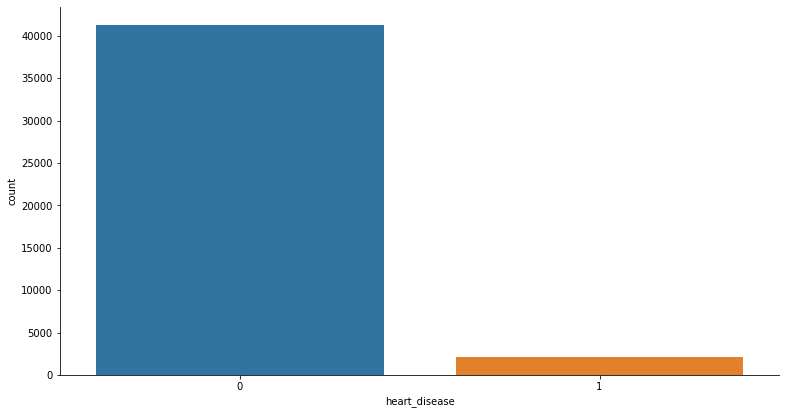

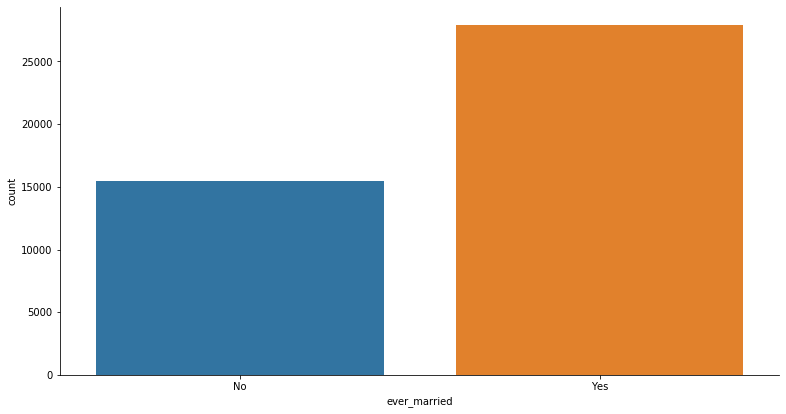

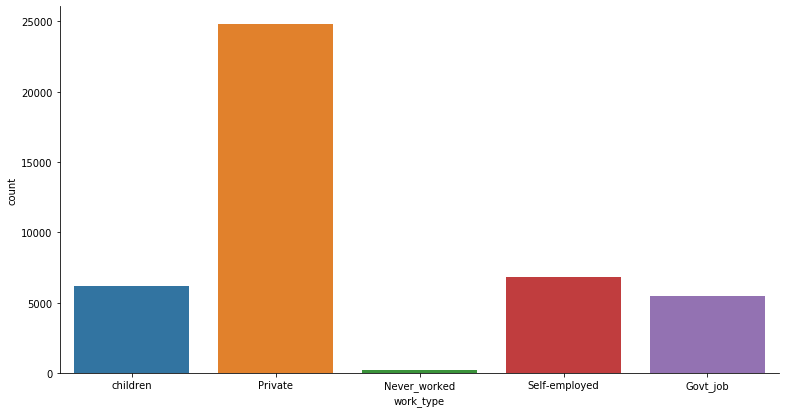

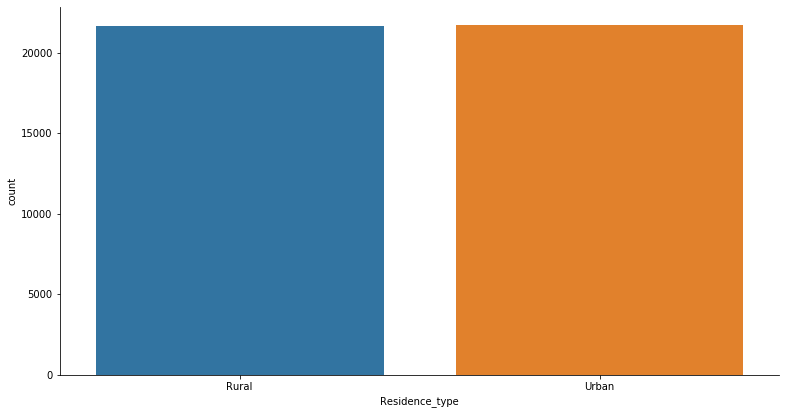

In [ ]:
sns.distplot(data.age)
sns.factorplot(x='gender', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.factorplot(x='hypertension', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.factorplot(x='heart_disease', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)

sns.factorplot(x='ever_married', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.factorplot(x='work_type', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.factorplot(x='Residence_type', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)


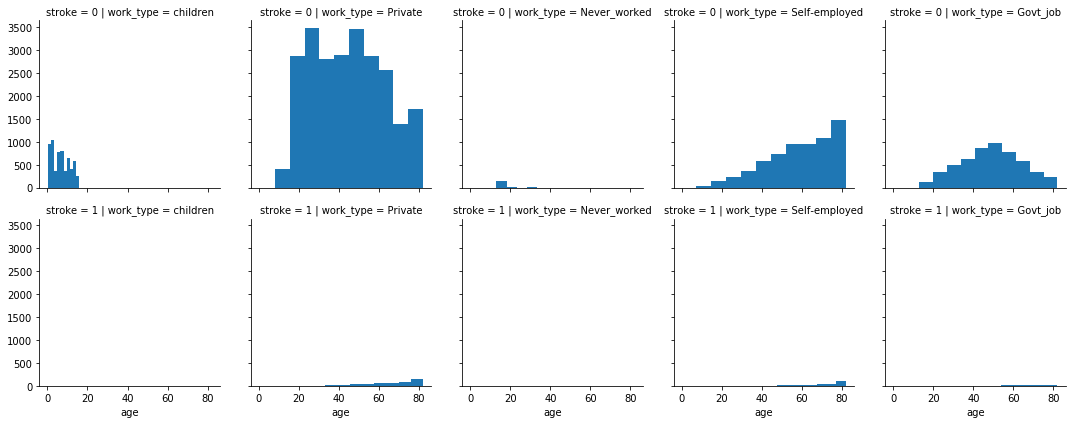

In [ ]:
 g = sns.FacetGrid(data, col="work_type",  row="stroke")
 g.map(plt.hist,"age")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py

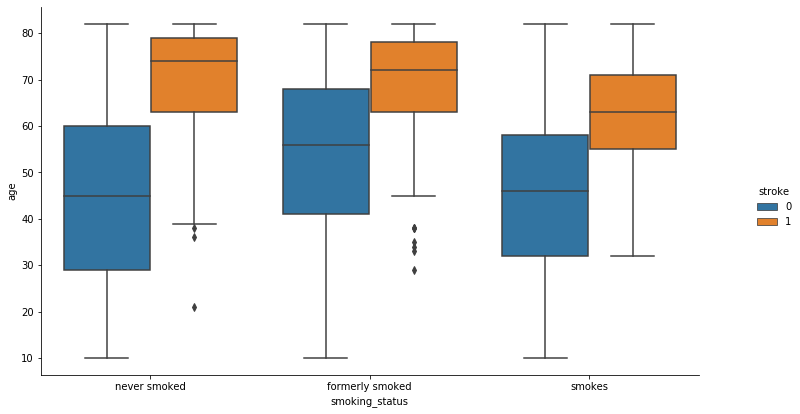

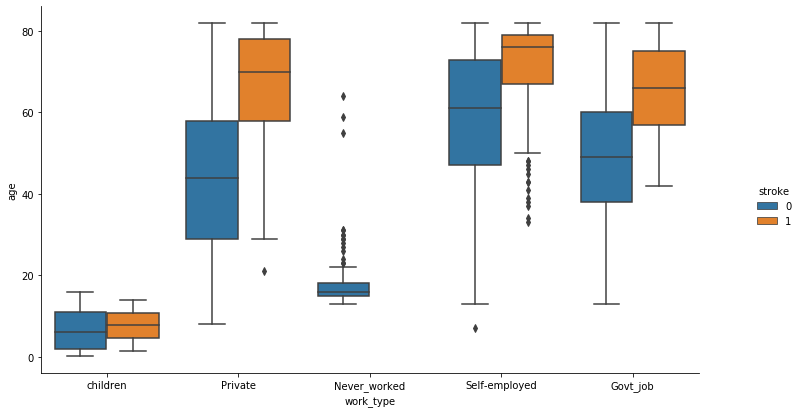

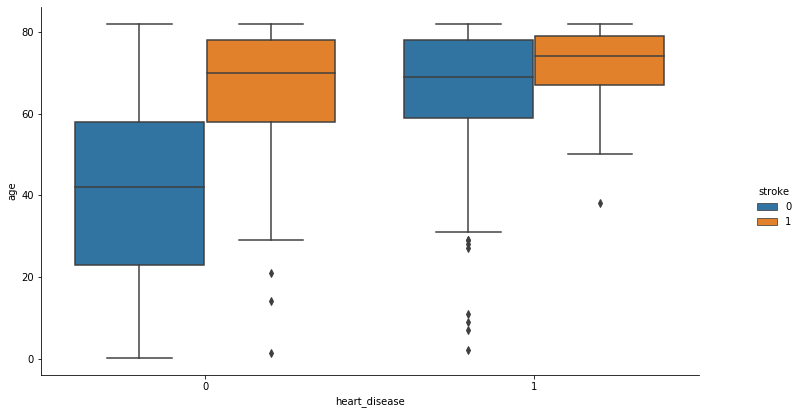

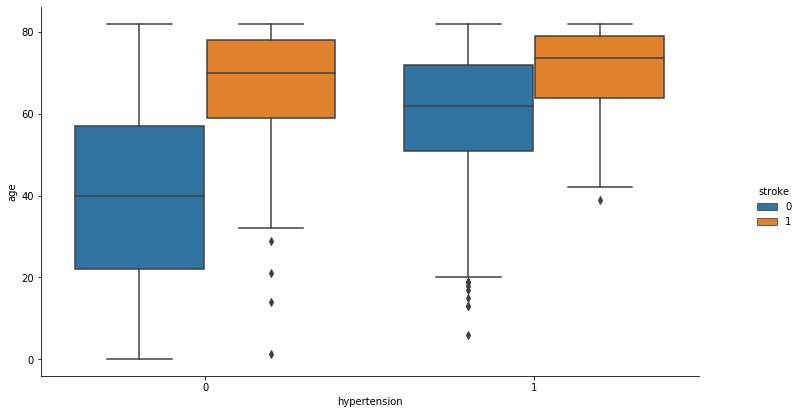

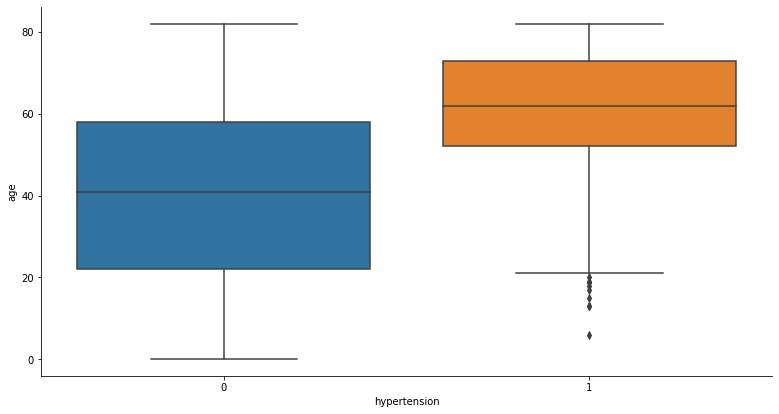

In [ ]:
g = sns.factorplot(x="smoking_status", y="age",
                 hue="stroke",
                 data=data, kind="box");
fig = plt.gcf()
fig.set_size_inches(12, 6)

g = sns.factorplot(x="work_type", y="age",
                 hue="stroke",
                 data=data, kind="box");
fig = plt.gcf()
fig.set_size_inches(12, 6)

g = sns.factorplot(x="heart_disease", y="age",
                 hue="stroke",
                 data=data, kind="box");
fig = plt.gcf()
fig.set_size_inches(12, 6)

g = sns.factorplot(x="hypertension", y="age",
                 hue="stroke",
                 data=data, kind="box");
fig = plt.gcf()
fig.set_size_inches(12, 6)

g = sns.factorplot(x="hypertension", y="age",
                 data=data, kind="box");
fig = plt.gcf()
fig.set_size_inches(12, 6)
                

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



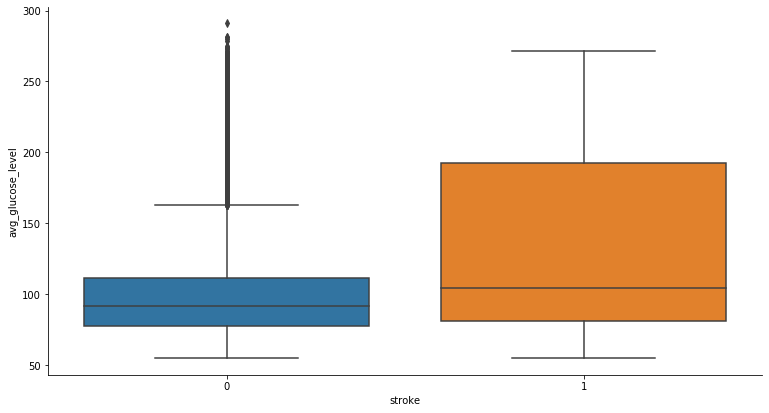

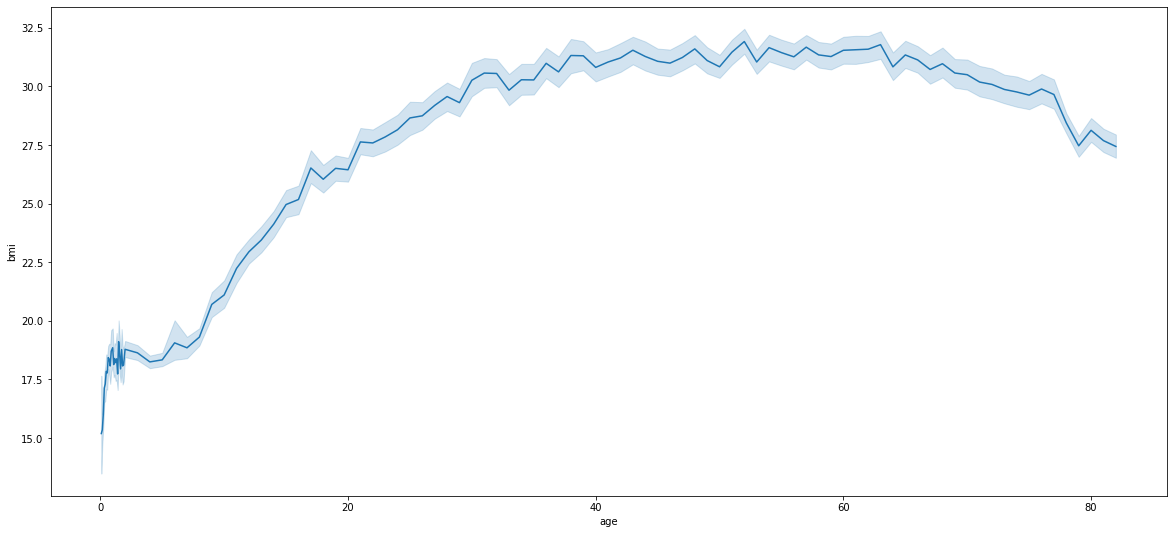

In [ ]:
g = sns.factorplot(x="stroke", y="avg_glucose_level",
                 data=data, kind="box");
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.figure(figsize=(20,9))
sns.lineplot(data = data, x='age',y='bmi')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



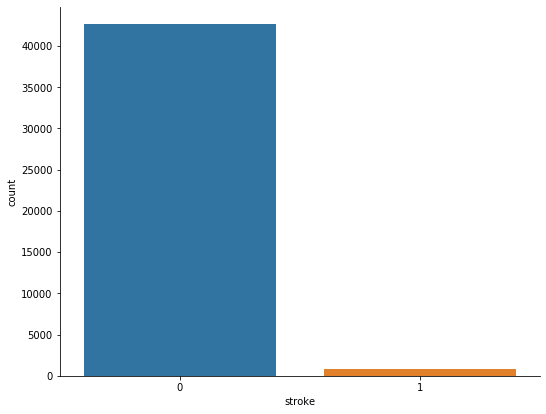

In [ ]:
sns.factorplot(x='stroke', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(8, 6)

In [ ]:
data.columns
data.shape

(43400, 12)

In [ ]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
data = data[data.gender != 'Other']

In [ ]:
data.shape

(43389, 12)

In [ ]:
data.isnull().sum()


id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1458
smoking_status       13290
stroke                   0
dtype: int64

In [ ]:
data.bmi.fillna(data.bmi.mean(),inplace=True)
data.bmi.mean()


28.60515608976722

In [ ]:
data_No_smoking_status = data[data.smoking_status.isnull()]
data_smoking_status = data.dropna(subset = ['smoking_status'])

In [ ]:
print(data_smoking_status.shape)
print(data_No_smoking_status.shape)

(30099, 12)
(13290, 12)


In [ ]:
data_No_smoking_status = data_No_smoking_status.drop(columns=['smoking_status'])

In [ ]:
(data_No_smoking_status.stroke == 1).sum()

145

In [ ]:
data_smoking_status.gender.head()

1      Male
3    Female
6    Female
7    Female
8    Female
Name: gender, dtype: object

In [ ]:
data_No_smoking_status['gender'] = data_No_smoking_status['gender'].astype('category').cat.codes

data_No_smoking_status['ever_married'] = data_No_smoking_status['ever_married'].astype('category').cat.codes

data_No_smoking_status['work_type'] = data_No_smoking_status['work_type'].astype('category').cat.codes

data_No_smoking_status['Residence_type'] = data_No_smoking_status['Residence_type'].astype('category').cat.codes



In [ ]:
data_No_smoking_status.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0
5,32257,0,47.0,0,0,1,2,1,210.95,50.1,0
10,10460,0,79.0,0,0,1,0,1,77.08,35.0,0


In [ ]:
data_smoking_status['gender'] = data_smoking_status['gender'].astype('category').cat.codes

data_smoking_status['ever_married'] = data_smoking_status['ever_married'].astype('category').cat.codes

data_smoking_status['work_type'] = data_smoking_status['work_type'].astype('category').cat.codes

data_smoking_status['Residence_type'] = data_smoking_status['Residence_type'].astype('category').cat.codes

data_smoking_status['smoking_status'] = data_smoking_status['smoking_status'].astype('category').cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [ ]:
data_smoking_status.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,52800,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,41413,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,15266,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
labels = data_No_smoking_status.columns[1:-1]

X = data_No_smoking_status[labels]
y = data_No_smoking_status['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()


In [ ]:
labels

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.06%


Confusion matrix:
 [[2633    0]
 [  25    0]]


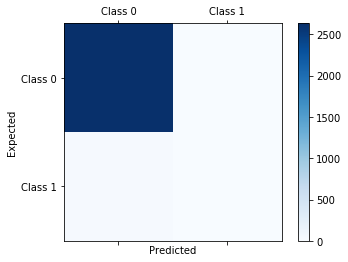

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
labels = data_smoking_status.columns[1:-1]

X = data_smoking_status[labels]
y = data_smoking_status['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()

In [ ]:
labels

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy: 98.06%
Confusion matrix:
 [[5903    0]
 [ 117    0]]


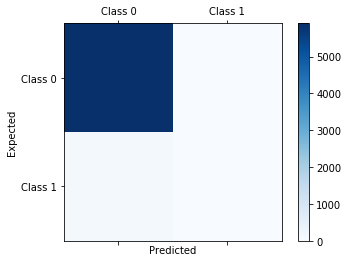

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)


In [ ]:
X_sm = pd.DataFrame(X_sm)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
y_sm = pd.DataFrame(y_sm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.5, random_state=1)

model = XGBClassifier()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 97.65%
Confusion matrix:
 [[14861     2]
 [  689 13909]]


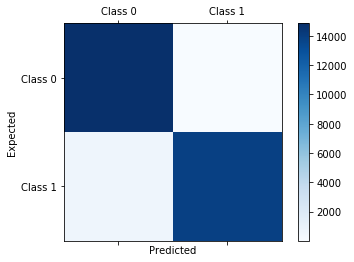

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()